Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

Loading the Data Set

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()                       

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are 9 columns in total - 
- The first 8 columns are features and the Outcome column is the target variable.
- Pregnancies decribes the number of times the person has been pregnant.
- Glucose describes the blood glucose level.
- Blood pressure describes the diastolic blood pressure.
- Skin Thickenss describes the skin fold thickness of the triceps.
- Insulin describes the amount of insulin in a 2hour serum test.
- BMI describes he body mass index; derived from the mass and height of a      person.
- DiabetesPedigreeFunction describes the family history of the person.
- Age describes the age of the person
- Outcome is the target variable describing whether the person is diabetic or not.

There are 768 entries.

In [3]:
diabetes.shape

(768, 9)

The dataset is free from missing values.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


If the Glucose, BP, BMI, SkinThickness of a person is 0, the person cannot survive, thus, we do not allow zero values in these columns.

In [5]:
zero_not_allowed = ["Glucose","BloodPressure",'BMI','SkinThickness' ]

for column in zero_not_allowed:
#     if 0 in diabetes[column]:
#        print('Yes')
    diabetes[column] = diabetes[column].replace(0, np.NaN)
    mean = int(diabetes[column].mean(skipna = True))
    diabetes[column] = diabetes[column].replace(np.NaN, mean)

- The statistical information of each column is given below

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The Outcome column is classified into two groups: 0 and 1.
- 0 indicates the person is not diabetic; there are 500 such entries.
- 1 indicates the person is diabetic; there are 268 entries. 



In [7]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The mean wrt to outcome that is non-diabetic or diabetic is given for each feature.

In [8]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.706000,70.920000,27.726000,68.792000,30.880200,0.429734,31.190000
1,4.865672,142.160448,75.123134,31.686567,100.335821,35.381343,0.550500,37.067164


<AxesSubplot:xlabel='Outcome', ylabel='count'>

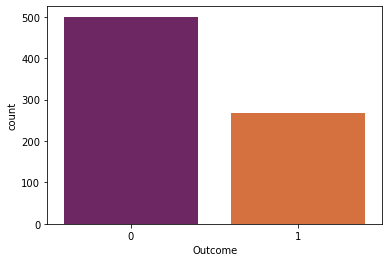

In [9]:
sns.countplot('Outcome',data=diabetes,palette='inferno')

The correlation between columns is given below.

In [10]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.331175,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.116547,0.543275,0.102188,0.126107,0.214873
Insulin,-0.073535,0.331175,-0.045769,0.116547,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231470,0.281132,0.543275,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.130548,0.312249,0.173844,0.238356,1.000000


We can visualize it below:
- All features have a positive correlation with Outcome; when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.
- Glucose and the Outcome have correlation 0.49, which is the highest.
- The next 5 features are BMI, Age,Pregnancies, SkinThickness,Insulin,DiabetesPedigreeFunction, BloodPressure that have correlation of 0.31,0.24,0.22,0.21,0.21,0.13,0.17  respectively.

<AxesSubplot:>

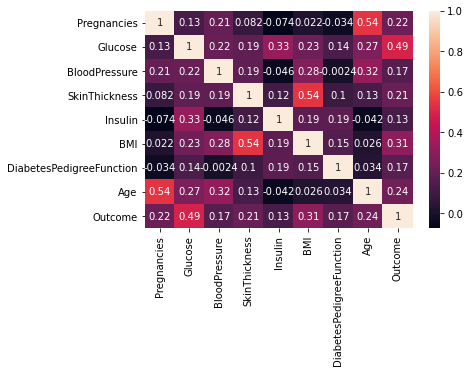

In [11]:
sns.heatmap(diabetes.corr(),annot=True)

For the EDA part we choose these 3 features out of the total 8 to plot a pairplot for classification.
We slice the dataset by choosing these 3 columns along with the Outcome column.

In [12]:
dsliced=diabetes[['Glucose','BMI','Age','Outcome']]

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
- We can observe that using Glucose, BMI, Age as features, we can classify the outcomes better.

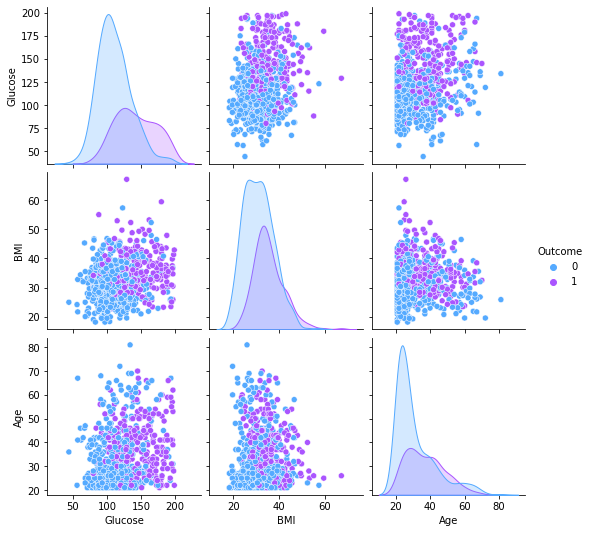

In [13]:
sns.pairplot(dsliced,hue='Outcome',palette='cool')

We observe that there are outliers-
- we can remove them.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

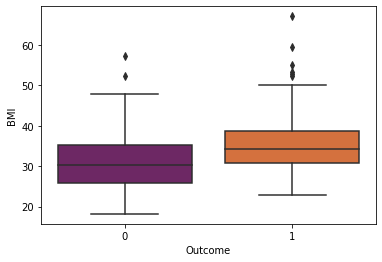

In [14]:
sns.boxplot(x="Outcome", y="BMI", data=diabetes,palette='inferno')

In [15]:
diabetes.groupby('Outcome').mean()
for i in diabetes['BMI']:
    if i > 50:
        diabetes.replace(i,diabetes['BMI'].mean(),inplace=True)

We can visualize that when the glucose level is between 120 to 170 the person is more prone to being diabetic.


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

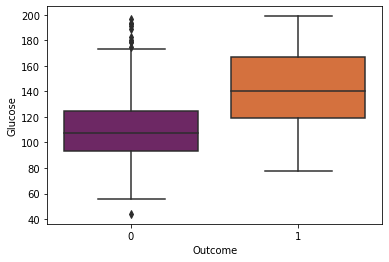

In [16]:
sns.boxplot(x='Outcome',y='Glucose',data=diabetes,palette='inferno')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

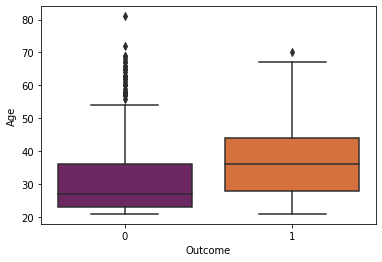

In [17]:
sns.boxplot(x='Outcome',y='Age',data=diabetes,palette='inferno')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

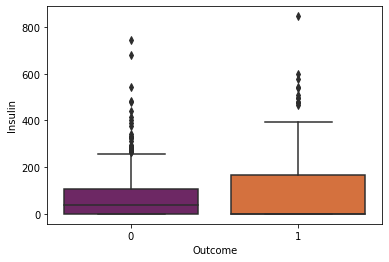

In [18]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetes,palette='inferno')

In [19]:
# for i,j in zip(diabetes['Insulin'],diabetes['Outcome']):
#     if j==0 and i > 500:
#         diabetes.replace(i,68.069028,inplace = True)
#     elif j==1 and i > 500:
#         diabetes.replace(i,92.442306,inplace = True)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

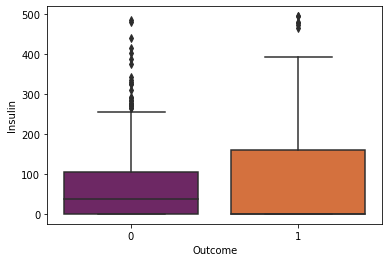

In [20]:
for i in diabetes['Insulin']:
    if i > 500:
        diabetes.replace(i,diabetes['Insulin'].mean(),inplace=True)
sns.boxplot(x='Outcome',y='Insulin',data=diabetes,palette='inferno')

Data Standardization

In [21]:
x = diabetes.drop(columns = 'Outcome',axis = 1)
y = diabetes['Outcome']

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(x)

StandardScaler()

In [24]:
std_data = scaler.transform(x)

We assign X as standardized data and Y as the labels(0 or 1)

In [25]:
X = std_data
Y = diabetes['Outcome']

Train - Test Split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2) 

#### - Using SVM

Modelling

- Hyperparameter Tuning
- Training

In [27]:
model1=SVC()

In [28]:
param_grid = {'kernel': ['linear'],
              "C":range(0,20)}

In [29]:
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=6)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': range(0, 20), 'kernel': ['linear']})

In [30]:
grid_search.best_score_

0.7735896947775873

In [31]:
final = grid_search.best_estimator_
final

SVC(C=1, kernel='linear')

In [32]:
model1 = SVC(kernel ='linear', C=1)

In [33]:
model1.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

- Evaluation

In [34]:
X_train_pred = model1.predict(X_train)

The accuracy score on training data tells us how well the model has trained.

In [35]:
accuracy_score(Y_train, X_train_pred)

0.7833876221498371

In [36]:
Y_pred = model1.predict(X_test)

The accuracy score on testing data tells us how well the model is making predictions

In [37]:
accuracy_score(Y_test,Y_pred)

0.7662337662337663

- Confusion Matrix

It tells us how many times the model has predicted correctly that a person is diabetic or not

In [38]:
confusion_matrix(Y_pred,Y_test)

array([[89, 25],
       [11, 29]], dtype=int64)

<AxesSubplot:>

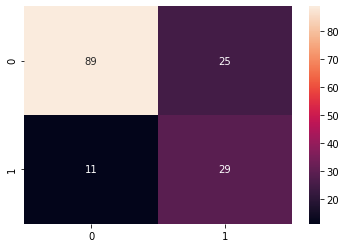

In [39]:
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



#### - Using KNN

- Hyperparameter Tuning


In [41]:
model2 = KNeighborsClassifier()

In [42]:
param_grid2 = {'n_neighbors': range(1,40),
              'metric':['manhattan','euclidean','minkowski']}

In [43]:
grid_search = GridSearchCV(model2, param_grid=param_grid2, cv=10)

In [44]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': range(1, 40)})

In [45]:
grid_search.best_score_

0.7835801163405607

In [46]:
grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

- Fitting the model

In [47]:
model2 = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 21)

- Training the model

In [48]:
model2.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

- Evaluation 

In [49]:
X_train_pred2 = model2.predict(X_train)

In [50]:
accuracy_score(X_train_pred2,Y_train)

0.7996742671009772

In [51]:
Y_pred2 = model2.predict(X_test)

In [52]:
accuracy_score(Y_pred2,Y_test)

0.7337662337662337

- Confusion Matrix

In [53]:
confusion_matrix(Y_pred2,Y_test)

array([[93, 34],
       [ 7, 20]], dtype=int64)

<AxesSubplot:>

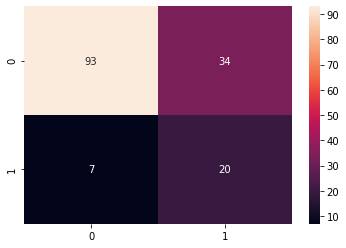

In [54]:
sns.heatmap(confusion_matrix(Y_pred2,Y_test),annot =  True)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154

